In [1]:
from pgd import *
import numpy as np
from IPython.display import HTML

# Lipschitz case

$\eta_t = \frac{R}{L\sqrt{t}}$ gives
$f(\bar{x_t})-f(x^*) \leq RL\sqrt{\frac{2}{T}}$  

In [2]:
class LipschitzPGD(PGD):
    def __init__(self, *args, **kwargs):
        self.lipschitz = kwargs.pop('lipschitz', 1.0)
        super().__init__(*args, **kwargs)

    def compute_upper_bound(self, t):
        return self.lipschitz*self.R/t**0.5

    def compute_eta(self,t):
        return self.R/(self.lipschitz*t**0.5)

    def compute_optimum(self, points):
        return np.mean(points[:,0])

In [3]:
# a = np.array([[1,2],[3,4],[5,6]])
# b = [[7,8]]
# np.append(a,b,axis=0)

In [4]:
# an example
def f(x):
    return np.abs(x)

def subgrad_f(x):
    return np.sign(x)

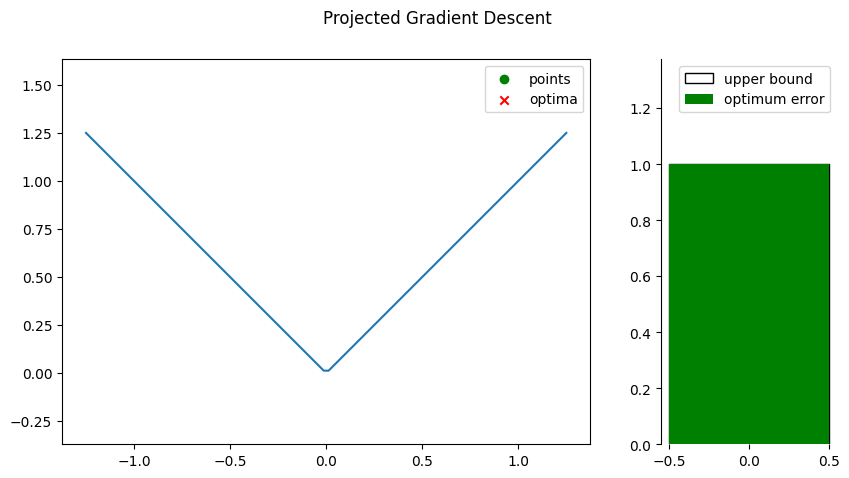

In [5]:
abs_value_example = LipschitzPGD(f, subgrad_f, x0=1, R=2.5, T=15, lipschitz=1.0)
ani = abs_value_example.animate()
HTML(ani.to_jshtml())